## Проект e-commerce: вариант 1 

Задача. Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на вопросы.

In [11]:
# команды для клонирования репозитария и создания своей ветки

# git clone git@git.lab.karpov.courses:lab/first_project.git
# cd first_projec
# git branch evgeny_artyukhov_15.03_e-artjuhov-22/variant1
# git checkout evgeny_artyukhov_15.03_e-artjuhov-22/variant1

In [12]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import timedelta
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [13]:
# считываем три таблицы:

# olist_customers_datase.csv (уникальные идентификаторы пользователей)

customers = pd.read_csv('olist_customers_dataset.csv')

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
# olist_orders_dataset.csv (заказы)

orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [15]:
# посмотрим на типы данных

orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [16]:
# olist_order_items_dataset.csv (товарные позиции)

items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# посмотрим на типы данных

items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [18]:
# разберемся в разнице между customer_id и customer_unique_id

# посчитаем количество уникальных customer_id

customers.groupby('customer_id', as_index = False) \
        .agg({'customer_id':'count'}).count()

customer_id    99441
dtype: int64

In [19]:
# есть ли повторяющиеся customer_id ?

customers.groupby('customer_id', as_index = False) \
        .agg({'customer_id':'count'}) \
        .query('customer_id > 1') \
        .count()

customer_id    0
dtype: int64

In [20]:
# посмотрим на размер таблицы orders

orders.shape[0]

99441

In [21]:
items.query('product_id == "aca2eb7d00ea1a7b8ebd4e68314663af"').head(30)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
619,016ff85737c2072ab00a705cd8f87799,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-09 11:19:25,75.0,20.02
643,017b1d6881222283afdc50baf3dcb0d5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-15 02:10:45,69.9,17.40
1172,02b939dcd55f2b17680e10690deb08b5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08
1173,02b939dcd55f2b17680e10690deb08b5,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08
1784,04105b54650921ca3246f52e6f175f46,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-27 09:31:35,69.9,0.00
1897,044bcd01474ba715e7cb11d5a70ccf0e,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-29 16:15:24,69.9,20.06
1973,047ad2bad6fa4c12dd98ff4b00ce0317,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-27 19:15:25,69.9,24.71
2379,055e6f9e14ac5805a9bcb99a480daeb1,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-02 13:11:29,75.0,20.02
2586,05ce664903d14969bd94d9633ffd8f14,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-16 01:15:30,69.9,19.98


In [22]:
# количество заказов и количество customer_id совпадают

# посчитаем количество уникальных customer_unique_id

customers.groupby('customer_unique_id', as_index = False) \
        .agg({'customer_unique_id':'count'}).count()

customer_unique_id    96096
dtype: int64

In [23]:
# повторов нет

In [24]:
# есть ли повторяющиеся customer_unique_id ?

customers.groupby('customer_unique_id', as_index = False) \
        .agg({'customer_unique_id':'count'}) \
        .query('customer_unique_id > 1') \
        .count()

customer_unique_id    2997
dtype: int64

In [25]:
# повторы есть

In [26]:
# посмотрим сколько повторов

customers.groupby(['customer_unique_id'], as_index = False) \
        .agg({'customer_unique_id':'count'}) \
        .query('customer_unique_id > 1') \
        .sort_values('customer_unique_id', ascending = False)

,customer_unique_id
52973,17
23472,9
10354,7
37797,7
76082,7
...,...
33730,2
33755,2
33829,2
33867,2


Вывод: К кажому заказу создается новый уникальный customer_id, связаный с customer_unique_id, одному customer_unique_id, может соответствовать несколько customer_id. Учтем это для дальнейших расчетов.

## Вопросы:

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?


In [27]:
# Под покупкой будем понимать заказы со статусом delivered —  "доставлен пользователю".
# Объеденим таблицы orders и customers
# Сгруппирруем по customer_unique_id
# Отберем тех пользователей, которые встречабются в таблице заказов только один раз

only_one_order = orders.merge(customers, on='customer_id') \
                        .query('order_status == "delivered"') \
                        .groupby(['customer_unique_id'], as_index=False) \
                        .agg({'customer_unique_id':'count'}) \
                        .query('customer_unique_id == 1') \
                        .shape[0]
print('Ответ: {} пользователей сделали по одной покупке.'.format(only_one_order))

Ответ: 90557 пользователей сделали по одной покупке.


### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [28]:
# всего недоставленных заказов:

orders.query('order_status == "canceled" or order_status == "unavailable"').shape[0]

1234

In [29]:
# объеденим все таблицы
df = customers.merge(orders, on='customer_id', how = 'inner')

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [30]:
# добавим года и месяцы.
# год нужен для последущей группировки по месяцам, иначе в один месяц будет аггрегироваться данные из разных годов.
    
df['order_purchase_year'] = df.order_purchase_timestamp.dt.year
df['order_purchase_month'] = df.order_purchase_timestamp.dt.month

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,7


In [31]:
# причины, по которым заказ недоставлен две:
# unavailable —  товар недоступен
# canceled —  заказ отменён

# посчитаем среднее значение недоступных заказов по месяцам

mean_unavailable = df.query('order_status == "unavailable"') \
    .groupby(['order_purchase_year', 'order_purchase_month'], as_index=False) \
    .agg({'order_id':'count'}) \
    .order_id.mean().round()

mean_unavailable = int(mean_unavailable)

In [32]:
# посчитаем среднее значение отмененных заказов по месяцам

mean_canceled = df.query('order_status == "canceled"') \
    .groupby(['order_purchase_year', 'order_purchase_month'], as_index=False) \
    .agg({'order_id':'count'}) \
    .order_id.mean().round()

mean_canceled = int(mean_canceled)

In [33]:
print('Ответ:\n')
print('{} заказов в месяц в среднем не доставляется по причине: canceled (заказ отменён)'.format(mean_canceled))
print('{} заказов в месяц в среднем не доставляется по причине: unavailable (товар недоступен)'.format(mean_unavailable))

Ответ:

26 заказов в месяц в среднем не доставляется по причине: canceled (заказ отменён)
29 заказов в месяц в среднем не доставляется по причине: unavailable (товар недоступен)


### 3. По каждому товару определить, в какой день недели товар чаще всего покупается?

In [34]:
# создаем рабочий датафрейм с необходимыми колонками
# понадобится id товара из items, объеденим при помощи merge

df3 = orders[['order_id', 'order_purchase_timestamp']].merge(items[['order_id', 'product_id']], on='order_id', how='left')

df3.head()

,order_id,order_purchase_timestamp,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e


In [35]:
# добавим колонку с днем недели

df3['day_name'] = df3.order_purchase_timestamp.dt.day_name()

df3.head()

,order_id,order_purchase_timestamp,product_id,day_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


In [36]:
# сгруппируем по товарам и дням недели, посчитаем количество заказов

df3 = df3.groupby(['product_id','day_name'], as_index=False) \
.agg({"order_id":'count'}) \
.sort_values('order_id', ascending=False)

df3.head()

,product_id,day_name,order_id
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41041,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41046,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


In [37]:
# "развернем" таблицу

df3 = df3.pivot(index='product_id', columns='day_name', values='order_id').fillna(0)

df3.head()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# добавим колонку с днем недели, в котором были максимальные продажи товара и колонку со значением проданных товаров

df3["max_sale_day"] = df3.idxmax(axis=1)
df3["max_items_sold"] = df3.max(axis=1)

df3.head()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,max_sale_day,max_items_sold
product_id,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sunday,1.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuesday,1.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Thursday,1.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Friday,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuesday,1.0


In [39]:
# отсортируем по максимальным значениям

df3 = df3.sort_values('max_items_sold', ascending=False)

df3.head()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,max_sale_day,max_items_sold
product_id,,,,,,,,,
422879e10f46682990de24d770e7f83d,77.0,64.0,57.0,47.0,79.0,67.0,93.0,Wednesday,93.0
99a4788cb24856965c36a24e339b6058,75.0,92.0,61.0,62.0,73.0,61.0,64.0,Monday,92.0
aca2eb7d00ea1a7b8ebd4e68314663af,87.0,78.0,59.0,55.0,89.0,85.0,74.0,Thursday,89.0
53b36df67ebb7c41585e8d54d6772e08,38.0,57.0,29.0,31.0,46.0,76.0,46.0,Tuesday,76.0
368c6c730842d78016ad823897a372db,67.0,50.0,44.0,54.0,58.0,63.0,52.0,Friday,67.0


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [40]:
# возьмем необходимые данные
# покупкой считаем только доставленные заказы
df4 = orders[['customer_id','order_purchase_timestamp','order_status']] \
        .merge(customers[['customer_unique_id','customer_id']], on='customer_id', how = 'left') \
        .query('order_status == "delivered"')

# добавим столбец "год-месяц"
df4['order_purchase_year_month'] = df4.order_purchase_timestamp.dt.to_period('M')

# добавим столбец "дней в месяце"
df4['days_in_month'] = df4.order_purchase_timestamp.dt.days_in_month

# посчитаем количество заказов по месяцам
df4 = df4.groupby(['customer_unique_id','order_purchase_year_month', 'days_in_month'], as_index=False) \
        .agg({'customer_id':'count'}) \
        .sort_values('customer_id', ascending=False) \
        .rename(columns={'customer_id': 'orders_number'})

# посчитаем среднее кол-во заказов в неделю по месяцам
df4['avg_orders_per_week'] = (df4.orders_number /(df4.days_in_month /7)).round(2)

df4

,customer_unique_id,order_purchase_year_month,days_in_month,orders_number,avg_orders_per_week
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,31,6,1.35
23222,3e43e6105506432c953e165fb2acf44c,2018-02,28,4,1.00
60370,a239b8e2fbce33780f1f1912e2ee5275,2017-02,28,4,1.00
67359,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,28,4,1.00
74559,c8460e4251689ba205045f3ea17884a1,2018-08,31,4,0.90
...,...,...,...,...,...
31900,55a55b65ef7f279bf0e5846a645e5ba6,2017-12,31,1,0.23
31899,55a4c5ebfd8fcc86eb83882fa0464977,2018-01,31,1,0.23
31898,55a44284e2c362a0199fb0df3ea9fb7d,2017-09,30,1,0.23
31897,55a36ff7f14abc01688647c613b35836,2017-12,31,1,0.23


### 5. Используя pandas, проведи когортный анализ пользователей.

В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Методика: 

https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

Определим основные параметры для когортоного анализа:

1. Признак формирования когорты — действие, которое объединяет людей в группу:первая покупка.
2. Размер когорты — временной интервал: месяц.
3. Отчетный период — время исследования поведения групп (с января по декабрь).
4. Анализируемый ключевой показатель: Retention Rate (уровень возврата пользователей).

Сделаем когорту пользователей с первой покупкой в период с января по декабрь.
Далее каждый месяц оцениваем группы по коэффициентам удержания (Retention Rate)

In [41]:
# подготовим данные

df = customers.merge(orders, on='customer_id', how = 'inner').query('order_status == "delivered"')

df = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

# создадим переменную order_purchase_month - месяц даты покупки.

df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# создадим переменную cohort, основанную на дате первой покупки (рассчитывается для каждого клиента)

df['cohort'] = df.groupby(['customer_unique_id'])['order_purchase_timestamp'].transform('min').dt.to_period('M')

df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_purchase_month,cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07,2018-07


Посмотрим на распределение количества заказов на одного пользователя.

In [42]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()

print(f'{100 * mult_orders_perc:.2f}% пользователей сделали заказ более 1 раза.')

3.00% пользователей сделали заказ более 1 раза.


Отобразим данные на гистрограмме

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


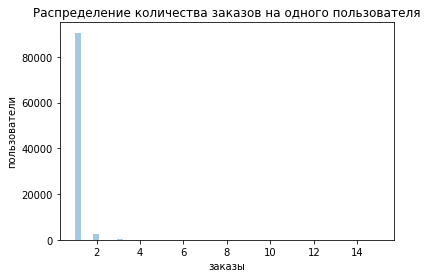

In [43]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Распределение количества заказов на одного пользователя',
       xlabel='заказы', 
       ylabel='пользователи');

In [44]:
# Затем мы агрегируем данные по cohort и order_month и подсчитываем количество уникальных клиентов в каждой группе.

df_cohort = df.groupby(['cohort', 'order_purchase_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

# Кроме того, мы добавляем period_number, который указывает количество периодов между месяцем когорты и месяцем покупки.

df_cohort['period_number'] = (df_cohort['order_purchase_month'] - df_cohort['cohort']).apply(attrgetter('n'))

df_cohort

,cohort,order_purchase_month,n_customers,period_number
0,2016-09,2016-09,1,0
1,2016-10,2016-10,262,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
214,2018-06,2018-07,25,1
215,2018-06,2018-08,16,2
216,2018-07,2018-07,5949,0
217,2018-07,2018-08,31,1


In [45]:
# cледующий шаг - развернуть таблицу df_cohort (при помощи pivot) таким образом,
# чтобы каждая строка содержала информацию о данной когорте,
# а каждый столбец содержал значения за определенный период.

cohort_pivot = df_cohort.pivot_table(index = 'cohort', columns = 'period_number', values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Чтобы получить retention matrix, нам нужно разделить значения каждой строки на первое значение строки,
# которое фактически является размером когорты cohort_size — всех клиентов, совершивших свою первую покупку в данном месяце.

cohort_size = cohort_pivot.iloc[:,0]

retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395,NaN
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199,NaN,NaN
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN


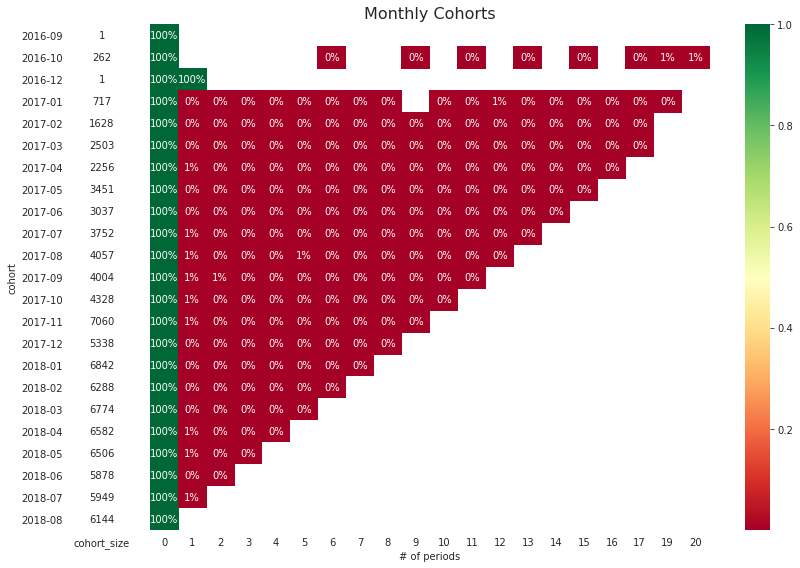

In [47]:
#  Строим тепловую карту (heatmap)


with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

Отвеча на вопрос, определим когорту с самым высоким retention на 3й месяц.

In [75]:
retention_matrix[3].max().round(3)*100

0.4

In [76]:
retention_matrix[3].idxmax()

Period('2017-06', 'M')

Когорта с самым высоким retention на 3й месяц: июнь 2017, равняется 0,4 %

### 6. Построить RFM-сегментацию пользователей

In [50]:
# Метрики:
# R - время от последней покупки пользователя до текущей даты,
# F - суммарное количество покупок у пользователя за всё время,
# M - сумма покупок за всё время.

In [51]:
# Подготовка данных
# Посчитаем сумму внутри каждого заказа

orders_sum = items[['order_id', 'product_id', 'price']] \
                    .groupby(['order_id', 'product_id'],as_index=False).agg({'price':'sum'}) \
                    .groupby(['order_id'],as_index=False).agg({'price':'sum'}).rename(columns={"price": "price_sum"})

orders_sum

,order_id,price_sum
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

In [52]:
# объеденим таблицы

df6 = orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']] \
        .merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='inner') \
        .merge(orders_sum, on='order_id', how='inner').drop('customer_id', axis=1)

In [53]:
# отфильтруем данные за один год.

df6 = df6.query('order_purchase_timestamp >= "2017-01-01" and order_purchase_timestamp < "2018-01-01"')
df6

,order_id,order_purchase_timestamp,customer_unique_id,price_sum
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,80bb27c7c16e8f973207a5086ab329e2,147.90
6,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,932afa1e708222e5821dac9cd5db4cae,59.99
7,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,39382392765b6dc74812866ee5ee92a7,19.90
...,...,...,...,...
96470,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,69.01
96471,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,e03dbdf5e56c96b106d8115ac336f47f,370.00
96472,880675dff2150932f1601e1c07eadeeb,2017-02-23 09:05:12,831ce3f1bacbd424fc4e38fbd4d66d29,139.90
96473,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,72.00


In [54]:
# смоделируем, что я делаю анализ в режиме реального времени, установив NOW через 1 день после последней покупки.

NOW = df6['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-01-01 23:29:31')

In [55]:
# изучим данные за один год

period = 365

In [56]:
# рассчитаем Recency, Frequency and Monetary Value для каждого пользователя

# добавим столбец с количеством дней между датой покупки и NOW.

# чтобы найти значения Recency - нужно найти минимум этого столбца для каждого клиента.

df6['days_since_order'] = df6['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
df6

,order_id,order_purchase_timestamp,customer_unique_id,price_sum,days_since_order
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99,91
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00,44
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,80bb27c7c16e8f973207a5086ab329e2,147.90,176
6,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,932afa1e708222e5821dac9cd5db4cae,59.99,230
7,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,39382392765b6dc74812866ee5ee92a7,19.90,343
...,...,...,...,...,...
96470,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,69.01,89
96471,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,e03dbdf5e56c96b106d8115ac336f47f,370.00,339
96472,880675dff2150932f1601e1c07eadeeb,2017-02-23 09:05:12,831ce3f1bacbd424fc4e38fbd4d66d29,139.90,312
96473,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,72.00,298


In [57]:
NOW - timedelta(days=period)

Timestamp('2017-01-01 23:29:31')

In [58]:
# баллы рассчитываются для каждого клиента. понадобится датафрейм данных с одной строкой на клиента.

# оценки будут храниться в столбцах.

aggr = {
    # количество дней после последнего заказа (Recency)
    'days_since_order': lambda x: x.min(),
    # общее количество заказов за последний период (Frequency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), 
}
rfm = df6.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000f46a3911fa3c0805444483337064,297,1
1,0000f6ccb0745a6a4b88665a16c9f078,81,1
2,0004aac84e0df4da2b147fca70cf8255,48,1
3,0005e1862207bf6ccc02e4228effd9a0,302,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1


In [68]:
# добавим Monetary

rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: df6[(df6['customer_unique_id'] == x) & \
                                                           (df6['order_purchase_timestamp'] >= NOW - timedelta(days=period))]\
                                                           ['price_sum'].sum())
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113,hibernating
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411,promising
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5,415,promising
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,hibernating
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211,hibernating


In [60]:
 
# будем использовать квантили. Каждый квантиль = 20% пользователей.

quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 38.0, 0.4: 92.0, 0.6: 156.0, 0.8: 231.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 68.8, 0.6: 107.9, 0.8: 179.9}}

In [61]:
# Методы для присвоения рангов от 1 до 5.

# Меньшее значение 'Recency' лучше, тогда как для 'Frequency', 'Monetary' наоборот - большее

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 

In [62]:
# все готово для получения оценок R, F и M для каждого клиента.

rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [63]:
# объединим 'R', 'F' и 'M' в 'RFM Score'

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5,415
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211


In [64]:
# будем работать с 11 сегментами на основе оценок R и F. Вот описание сегментов:

# Champions (Чемпионы) = Покупают недавно, покупают часто и тратят больше всего.
# Loyal Customers (Постоянные клиенты) = Покупают на регулярной основе. Реагируют на рекламные акции.
# Potential Loyalist (Потенциальный лояльный клиент) = Недавние клиенты со средней частотой покупок.
# Recent Customers (Недавние клиенты) = Покупали недавно, но не часто.
# Promising (Перспективные) = Недавние покупатели, но не потратили много.
# Customers Needing Attention (Клиенты, нуждающиеся во внимании) = RFM выше среднего.
# About To Sleep (Скоро "уснут") = RFM ниже среднего. Можно потерять, если не активировать.
# At Risk (Риск) = Покупали часто, но давно. Нужно вернуть их!
# Can’t Lose Them (Нельзя их потерять!) = Часто покупали, но долго не возвращаются.
# Hibernating (Спящий режим) = Последняя покупка была давно и небольшое количеством заказов. Может быть потерян.

segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head(20)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113,hibernating
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411,promising
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5,415,promising
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,hibernating
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211,hibernating
5,00082cbe03e478190aadbea78542e933,43,1,79.00,4,1,3,413,promising
6,000a5ad9c4601d2bbdd9ed765d5213b3,143,1,76.99,3,1,3,313,about to sleep
7,000bfa1d2f1a41876493be685390d6d3,94,1,35.00,3,1,1,311,about to sleep
8,000c8bdb58a29e7115cfc257230fb21b,20,1,13.90,5,1,1,511,new customers
9,000de6019bb59f34c099a907c151d855,137,1,229.80,3,1,5,315,about to sleep


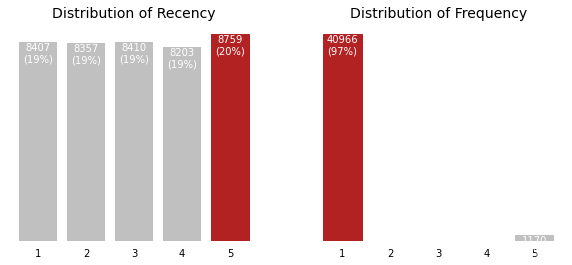

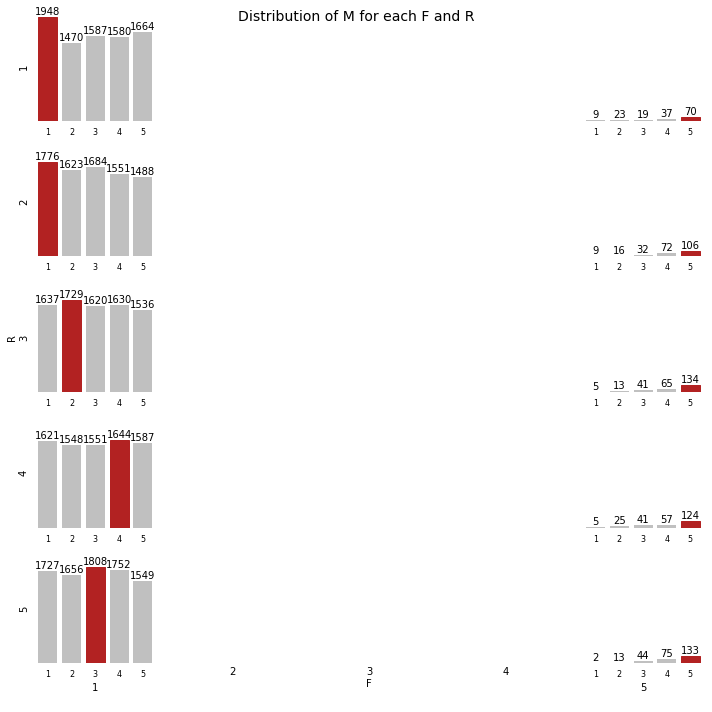

In [65]:
# визуализация

# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [66]:
# Посмотрим на распределение сегментов

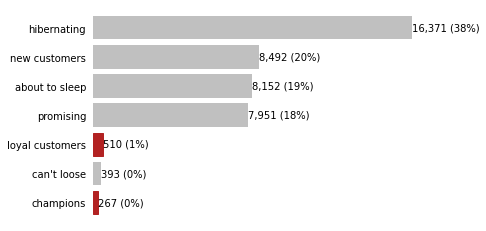

In [67]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

38% покупателей - "спящие клиенты" Покупали давно и совершили одну покупку. 
20% покупателей - новые клиенты, недавно совершили одну покупу, если с ними не работать, то они уйдут в спящих клиентов. Стоит обратить на эту группу внимание
20% - "почти уснули" - бывшие новые клиенты, с которыми вовремя не поработали
18% - перспективных клиентов
Лишь 1% - лояльных клиентов - покупали недавно и часто

Вывод: данные говорят о том, что 99% всех клиентов делают разовую покупку и не возвращаются. Нужно задуматься о системе продаж, программе лояльности, бонусах, скидках, клиентоориентированности, возможно о повышении качества обслуживания и пр. В данной ситуации ни один механизм, направленный на удержание клиента не работает